## An example of how to use bilby to perform parameter estimation for hyper params

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bilby.core.likelihood import GaussianLikelihood
from bilby.core.prior import Uniform
from bilby.core.sampler import run_sampler
from bilby.core.result import make_pp_plot
from bilby.hyper.likelihood import HyperparameterLikelihood

In [20]:
outdir = 'outdir'

### Model:

In [3]:
# Define a model to fit to each data set
def model(x, c0, c1):
    return c0 + c1 * x

### Number of events:

In [4]:
N = 10
x = np.linspace(0, 10, N)
sigma = 1
Nevents = 4
labels = ['a', 'b', 'c', 'd']

### True hyper parameters:

In [6]:
true_mu_c0 = 5
true_sigma_c0 = 1

### Generating data and estimating posteriors for $c_0$ for different events:

17:52 bilby INFO    : Running for label 'individual_0', output will be saved to 'outdir'
17:52 bilby INFO    : Search parameters:
17:52 bilby INFO    :   c0 = Uniform(minimum=-10, maximum=10, name='c0', latex_label='c0', unit=None, boundary=None)
17:52 bilby INFO    :   c1 = Uniform(minimum=-10, maximum=10, name='c1', latex_label='c1', unit=None, boundary=None)
17:52 bilby INFO    : Single likelihood evaluation took 1.102e-04 s
17:52 bilby WARNING : Supplied argument 'npool' not an argument of 'Nestle', removing.
17:52 bilby WARNING : Supplied argument 'resume' not an argument of 'Nestle', removing.
17:52 bilby INFO    : Using sampler Nestle with kwargs {'verbose': False, 'method': 'multi', 'npoints': 1000, 'update_interval': None, 'npdim': None, 'maxiter': None, 'maxcall': None, 'dlogz': None, 'decline_factor': None, 'rstate': None, 'callback': None, 'steps': 20, 'enlarge': 1.2}


17:52 bilby INFO    : Sampling time: 0:00:03.636566
17:52 bilby INFO    : Summary of results:
nsamples: 9597
ln_noise_evidence:    nan
ln_evidence: -21.419 +/-  0.082
ln_bayes_factor:    nan +/-  0.082

17:52 bilby INFO    : Running for label 'individual_1', output will be saved to 'outdir'
17:52 bilby INFO    : Search parameters:
17:52 bilby INFO    :   c0 = Uniform(minimum=-10, maximum=10, name='c0', latex_label='c0', unit=None, boundary=None)
17:52 bilby INFO    :   c1 = Uniform(minimum=-10, maximum=10, name='c1', latex_label='c1', unit=None, boundary=None)
17:52 bilby INFO    : Single likelihood evaluation took 9.167e-05 s
17:52 bilby WARNING : Supplied argument 'npool' not an argument of 'Nestle', removing.
17:52 bilby WARNING : Supplied argument 'resume' not an argument of 'Nestle', removing.
17:52 bilby INFO    : Using sampler Nestle with kwargs {'verbose': False, 'method': 'multi', 'npoints': 1000, 'update_interval': None, 'npdim': None, 'maxiter': None, 'maxcall': None, 'dlogz

17:52 bilby INFO    : Sampling time: 0:00:03.404964
17:52 bilby INFO    : Summary of results:
nsamples: 9488
ln_noise_evidence:    nan
ln_evidence: -21.641 +/-  0.081
ln_bayes_factor:    nan +/-  0.081

17:52 bilby INFO    : Running for label 'individual_2', output will be saved to 'outdir'
17:52 bilby INFO    : Search parameters:
17:52 bilby INFO    :   c0 = Uniform(minimum=-10, maximum=10, name='c0', latex_label='c0', unit=None, boundary=None)
17:52 bilby INFO    :   c1 = Uniform(minimum=-10, maximum=10, name='c1', latex_label='c1', unit=None, boundary=None)
17:52 bilby INFO    : Single likelihood evaluation took 1.093e-04 s
17:52 bilby WARNING : Supplied argument 'npool' not an argument of 'Nestle', removing.
17:52 bilby WARNING : Supplied argument 'resume' not an argument of 'Nestle', removing.
17:52 bilby INFO    : Using sampler Nestle with kwargs {'verbose': False, 'method': 'multi', 'npoints': 1000, 'update_interval': None, 'npdim': None, 'maxiter': None, 'maxcall': None, 'dlogz

17:52 bilby INFO    : Sampling time: 0:00:03.327569
17:52 bilby INFO    : Summary of results:
nsamples: 9468
ln_noise_evidence:    nan
ln_evidence: -20.335 +/-  0.081
ln_bayes_factor:    nan +/-  0.081

17:52 bilby INFO    : Running for label 'individual_3', output will be saved to 'outdir'
17:52 bilby INFO    : Search parameters:
17:52 bilby INFO    :   c0 = Uniform(minimum=-10, maximum=10, name='c0', latex_label='c0', unit=None, boundary=None)
17:52 bilby INFO    :   c1 = Uniform(minimum=-10, maximum=10, name='c1', latex_label='c1', unit=None, boundary=None)
17:52 bilby INFO    : Single likelihood evaluation took 1.095e-04 s
17:52 bilby WARNING : Supplied argument 'npool' not an argument of 'Nestle', removing.
17:52 bilby WARNING : Supplied argument 'resume' not an argument of 'Nestle', removing.
17:52 bilby INFO    : Using sampler Nestle with kwargs {'verbose': False, 'method': 'multi', 'npoints': 1000, 'update_interval': None, 'npdim': None, 'maxiter': None, 'maxcall': None, 'dlogz

17:52 bilby INFO    : Sampling time: 0:00:03.417385
17:52 bilby INFO    : Summary of results:
nsamples: 9435
ln_noise_evidence:    nan
ln_evidence: -19.489 +/-  0.081
ln_bayes_factor:    nan +/-  0.081



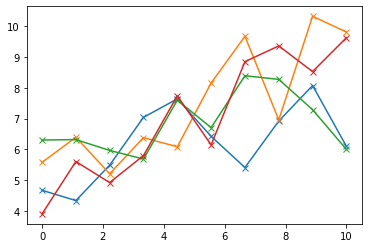

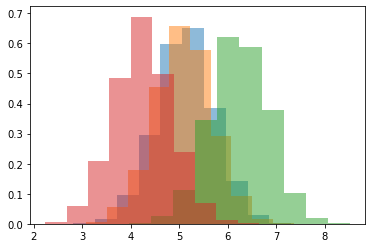

In [30]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

# Make the sample sets
results = list()
for i in range(Nevents):
    c0 = np.random.normal(true_mu_c0, true_sigma_c0)
    c1 = np.random.uniform(-1, 1)
    injection_parameters = dict(c0=c0, c1=c1)

    data = model(x, **injection_parameters) + np.random.normal(0, sigma, N)
    line = ax1.plot(x, data, '-x', label=labels[i])

    likelihood = GaussianLikelihood(x, data, model, sigma)
    priors = dict(c0=Uniform(-10, 10, 'c0'), c1=Uniform(-10, 10, 'c1'))

    result = run_sampler(
        likelihood=likelihood, priors=priors, sampler='nestle', nlive=1000,
        outdir=outdir, verbose=False, label='individual_{}'.format(i),
        save=False, injection_parameters=injection_parameters)
    ax2.hist(result.posterior.c0, color=line[0].get_color(), density=True,
             alpha=0.5, label=labels[i])
    results.append(result)
    
#plotting
ax1.set_xlabel('x')
ax1.set_ylabel('y(x)')
ax1.legend()
fig1.savefig('outdir/hyper_parameter_data.png')
ax2.set_xlabel('c0')
ax2.set_ylabel('density')
ax2.legend()
fig2.savefig('outdir/hyper_parameter_combined_posteriors.png')

### Defining the hyper-prior function for hyper parameters $\mu_{c_{0}}$ and $\sigma_{c_{0}}$:

In [31]:
def hyper_prior(dataset, mu, sigma):
    return np.exp(- (dataset['c0'] - mu)**2 / (2 * sigma**2)) /\
        (2 * np.pi * sigma**2)**0.5


def run_prior(dataset):
    return 1 / 20

### Collecting samples and evidences for posteriors of $c_0$ for all events:

In [32]:
samples = [result.posterior for result in results]
evidences = [result.log_evidence for result in results]

### Hyper likelihood:

In [26]:
hp_likelihood = HyperparameterLikelihood(
    posteriors=samples, hyper_prior=hyper_prior,
    sampling_prior=run_prior, log_evidences=evidences, max_samples=500)

### Hyper priors

In [27]:
hp_priors = dict(mu=Uniform(-10, 10, 'mu', '$\mu_{c0}$'),
                 sigma=Uniform(0, 10, 'sigma', '$\sigma_{c0}$'))

### Running sampler for hyper parameter estimation:

In [28]:
result = run_sampler(
    likelihood=hp_likelihood, priors=hp_priors, sampler='dynesty', nlive=1000,
    use_ratio=False, outdir=outdir, label='hyper_parameter',
    verbose=True, clean=True)

12:25 bilby INFO    : Running for label 'hyper_parameter', output will be saved to 'outdir'
12:25 bilby INFO    : Search parameters:
12:25 bilby INFO    :   mu = Uniform(minimum=-10, maximum=10, name='mu', latex_label='$\\mu_{c0}$', unit=None, boundary=None)
12:25 bilby INFO    :   sigma = Uniform(minimum=0, maximum=10, name='sigma', latex_label='$\\sigma_{c0}$', unit=None, boundary=None)
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
12:25 bilby INFO    : Single likelihood evaluation took 2.812e-04 s


12:25 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 1, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f9bad2b2810>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5}
12:25 bilby INFO    : Checkpoint every check_point_delta_t = 600s
12:25 bilby INFO    : Using dynesty version 1.0.1
12:25 bilby INFO    : Using the bilby-implemented rwalk sa

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero en

/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
/home/mukesh/anaconda3/envs/pycbc/lib/python3.7/site-packages/bilby/hyper/likelihood.py:65: RuntimeWarning: divide by zero encountered in log
  self.data['prior'], axis=-1)))
12:29 bilby INFO    : Written checkpoint file outdir/hyper_parameter_resume.pickle
12:29 bilby INFO    : Writing 3619 current samples to outdir/hyper_parameter_samples.dat


12:29 bilby INFO    : Sampling time: 0:03:44.701914
12:29 bilby INFO    : Summary of results:
nsamples: 10772
ln_noise_evidence: -88.430
ln_evidence: -86.500 +/-  0.082
ln_bayes_factor:  1.931 +/-  0.082



12:29 bilby INFO    : Key: KS-test p-value
12:29 bilby INFO    : c0: 0.4736830703279228
12:29 bilby INFO    : c1: 0.635318962926035
12:29 bilby INFO    : Combined p-value: 0.6623219088608416


(<Figure size 432x288 with 1 Axes>,
 pvals(combined_pvalue=0.6623219088608416, pvalues=[0.4736830703279228, 0.635318962926035], names=['c0', 'c1']))

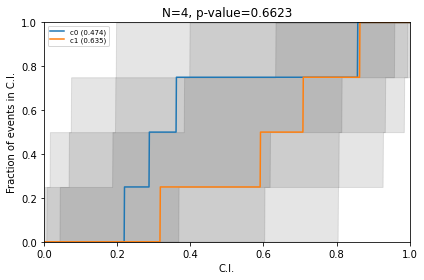

In [29]:
result.plot_corner(truth=dict(mu=true_mu_c0, sigma=true_sigma_c0))
make_pp_plot(results, filename=outdir + '/hyper_parameter_pp.png')